In [1]:
# 导入一些常用包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

#解决中文显示问题，Mac
%matplotlib inline
from matplotlib.font_manager import FontProperties

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
# 引入第 1 个数据集 Salary_Ranges_by_Job_Classification
salary_ranges = pd.read_csv('../../dataset/Salary_Ranges_by_Job_Classification.csv')

# 引入第 2 个数据集 GlobalLandTemperaturesByCity
climate = pd.read_csv('../../dataset/GlobalLandTemperaturesByCity.csv')
# 移除缺失值
climate.dropna(axis=0, inplace=True)

In [3]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [4]:
# 日期转换, 将dt 转换为日期，取年份, 注意map的用法
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value: value.year)
climate_sub_china = climate.loc[climate['Country'] == 'China']
climate_sub_china['Century'] = climate_sub_china['year'].map(lambda x:int(x/100 +1))

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
# 设置显示的尺寸
plt.rcParams['figure.figsize'] = (4.0, 4.0) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文

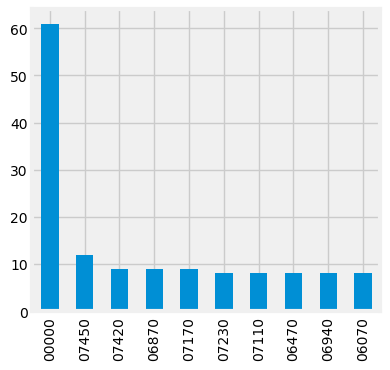

In [7]:
# 绘制条形图
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

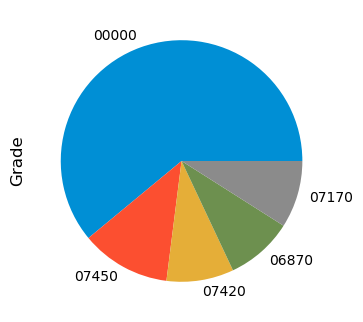

In [8]:
# 绘制饼图
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

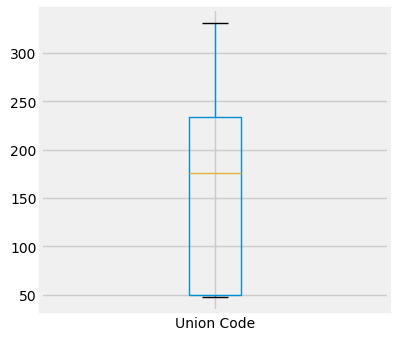

In [9]:
# 绘制箱体图
salary_ranges['Union Code'].value_counts().sort_values(ascending=False).head(5).plot(kind='box')

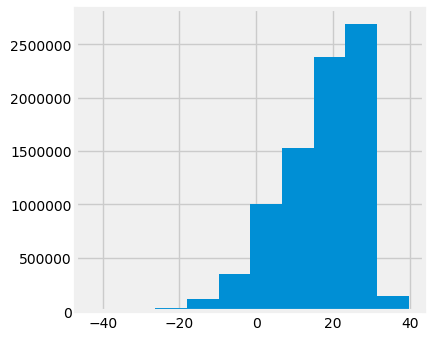

In [10]:
# 绘制直方图
climate['AverageTemperature'].hist()

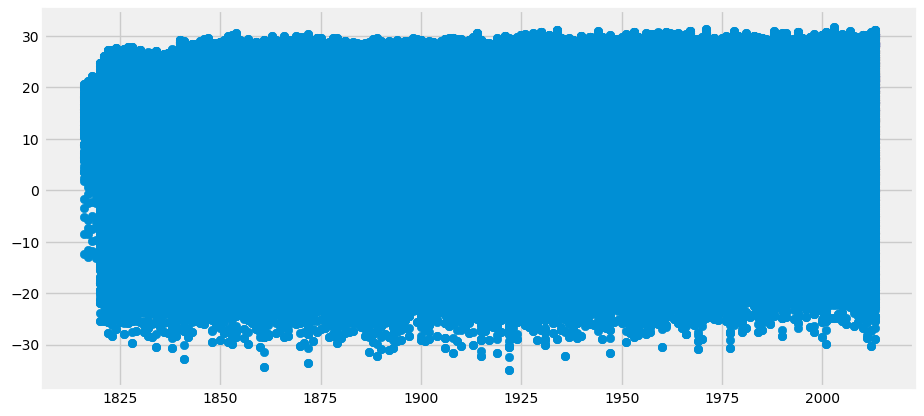

In [11]:
# 绘制散点图
x = climate_sub_china['year']
y = climate_sub_china['AverageTemperature']
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()